In [1]:
# Import required libraries

%matplotlib inline

import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

import yfinance as yf

In [2]:
# Simulate a portfolio of stocks. 
# Define the symbols, the weights, and the investment amount.
# Define the confidence level

# create your portfolio of stocks
# For this example I just use the FAANG stocks.
tickers = ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

# pick the weights of each stock (must add to 1)
weights = np.array([0.25, 0.15, 0.15, 0.3, 0.15])

# the size of the portfolio
portfolio_value = 1_000

# the confidence interval (95%)
confidence = 0.05

# Get the stock data for all the symbols
data = yf.download(tickers, start="2015-01-01", end="2022-12-31")["Close"]

[*********************100%***********************]  5 of 5 completed


In [3]:
# Compute portfolio returns
# Take the covariance between the stocks in the portfolio into consideration

# compute daily returns of each stock
returns = data.pct_change()

# compute the daily mean returns of each stock
mean_returns = returns.mean()

# compute portfolio mean return
port_mean = mean_returns.dot(weights)

# mean of investment returns
investment_mean = (1 + port_mean) * portfolio_value

# compute the portfolio covariance matrix
cov_matrix = returns.cov()

# compute portfolio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

# standard deviation of investment returns
investment_stdev = portfolio_value * port_stdev

In [4]:
# Compute VaR (Value at Risk)

# ppf takes a percentage and returns a standard deviation 
# multiplier for what value that percentage occurs at.
# It is equivalent to a one-tail test on the density plot.
percent_point = norm.ppf(confidence, investment_mean, investment_stdev)

# VaR is the portfolio value less this amount.

# calculate the VaR at the confidence interval
value_at_risk = portfolio_value - percent_point

# print it out
print(f"Portfolio VaR: {value_at_risk}")

Portfolio VaR: 28.189930702646848


### This is the most you can expect to lose in one day with 95% confidence.

# Scaling VaR to different time frames

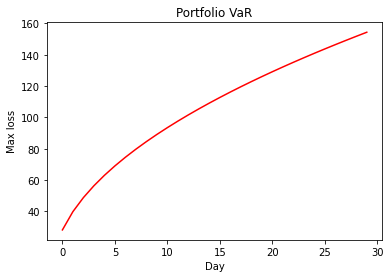

In [5]:
# Multiply the one-day VaR by the square root of one (day) through the square root of 30 (days).

value_at_risks = value_at_risk * np.sqrt(range(1, 31))

# Create a plot

# build plot of VaR over time
plt.xlabel("Day")
plt.ylabel("Max loss")
plt.title("Portfolio VaR")
plt.plot(value_at_risks, "r")

# Save the figure.
# plt.savefig("./Images/portfolioVaR.jpg")

# show the plot
plt.show()

VaR is a simple measure that comes with various assumptions, caveats, and criticisms. It should be used as one of many risk management techniques. Despite its simplicity, it is a useful tool in the trader’s tool belt.